In [1]:
#standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Getting the data  ready

    1. Split the data into features and labels (x and y)
    2. Filling (imputing) or disregarding missing values 
    3. Converting non-numerical values to numericals (feature encoding)

In [2]:
#importing data
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# #creating features
# x = heart_disease.drop("target", axis=1)
# x.head()

In [4]:
# #creating labels
# y = heart_disease["target"]
# y.head()

In [5]:
#splitting into training and testing data
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [7]:
# x.shape

In [8]:
len(heart_disease) * 0.8

242.4

## 1.1 Making sure it's all numerical

In [5]:
# car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [6]:
len(car_sales)

1000

In [7]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [8]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [9]:
#splitting into training and testing data
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [10]:
#Turning the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [11]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [16]:
#alternative method using pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [12]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
model.score(x_test, y_test)

0.3235867221569877

## Fit 2

## 1.2 What if there are missing values 

1. Filling with some values (imputation).
2. Removing the samples altogether .

In [14]:
#import car sales missing data
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [15]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [16]:
#creating features and labels
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

## Option 1: Fill missing data with pandas

In [18]:
import warnings
warnings.filterwarnings("ignore")
car_sales_missing["Make"].fillna("Missing", inplace=True)
car_sales_missing["Colour"].fillna("Missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [19]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
# Removing rows with missing price value
car_sales_missing.dropna(inplace=True)

In [21]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [22]:
len(car_sales_missing)

950

In [23]:
#Splittng data into features and labels
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [24]:
#Converting non-numerical values into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()

categorical_features = ["Make", "Colour", "Doors"]

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

## Option 2. Filling missing values with scikit-learn

In [25]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
#dropping rows with missing labels
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [28]:
#selecting features and labels
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [29]:
#splitting data into features and labels
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with Missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
num_imputer = SimpleImputer(strategy="mean")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

#defining the different categories
cat_features = ["Make","Colour"]
num_feature = ["Odometer (KM)"]
door_feature = ["Doors"]

#creating an imputer
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("num_imputer", num_imputer, num_feature),
                             ("door_imputer", door_imputer, door_feature)])

#filling training and test sets separately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

#checking filled x_train
filled_x_train

array([['Honda', 'White', 71934.0, 4.0],
       ['Toyota', 'Red', 162665.0, 4.0],
       ['Honda', 'White', 42844.0, 4.0],
       ...,
       ['Toyota', 'White', 196225.0, 4.0],
       ['Honda', 'Blue', 133117.0, 4.0],
       ['Honda', 'Missing', 150582.0, 4.0]], shape=(760, 4), dtype=object)

In [32]:
#getting transformed data into dataframe
car_sales_filled_train = pd.DataFrame(filled_x_train,
                                     columns = ["Make", "Colour",  "Odometer (KM)", "Doors"])
car_sales_filled_test = pd.DataFrame(filled_x_test,
                                    columns = ["Make", "Colour", "Odometer (KM)", "Doors"])

In [33]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [34]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [35]:
car_sales_filled_train["Odometer (KM)"].mean()

np.float64(130319.03314917117)

In [36]:
missing = car_sales_filled_train.loc[car_sales_filled_train["Make"] == "Missing"]
missing

,Make,Colour,Odometer (KM),Doors
5,Missing,White,126669.0,4.0
19,Missing,White,109384.0,4.0
51,Missing,White,66461.0,3.0
52,Missing,Blue,77978.0,4.0
90,Missing,White,53531.0,4.0
115,Missing,Red,97345.0,4.0
147,Missing,Red,227262.0,4.0
182,Missing,Blue,166897.0,4.0
195,Missing,Blue,48777.0,4.0
230,Missing,Blue,90249.0,4.0


In [37]:
missing = car_sales_filled_train.loc[car_sales_filled_train["Colour"] == "Missing"]
missing

,Make,Colour,Odometer (KM),Doors
17,Honda,Missing,102032.0,4.0
23,Toyota,Missing,199315.0,4.0
41,Toyota,Missing,73360.0,4.0
47,Honda,Missing,41846.0,4.0
56,Honda,Missing,42379.0,4.0
89,Honda,Missing,22409.0,4.0
101,Nissan,Missing,129820.0,4.0
102,BMW,Missing,130319.033149,5.0
160,BMW,Missing,126441.0,5.0
166,Honda,Missing,178774.0,4.0


In [38]:
car_sales_missing["Odometer (KM)"].mean()

np.float64(130987.44789356984)

In [39]:
car_sales_filled_train.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,71934.0,4.0
1,Toyota,Red,162665.0,4.0
2,Honda,White,42844.0,4.0
3,Honda,White,195829.0,4.0
4,Honda,Blue,219217.0,4.0


In [40]:
#Turning non-numerical data into numbers
from sklearn.preprocessing import OneHotEncoder
#Column Transformer already imported

one_hot = OneHotEncoder()

categorical_features = ["Make", "Colour", "Doors"]

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder = "passthrough")

transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [41]:
#fitting a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(transformed_x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
model.score(transformed_x_test, y_test)

0.21312658807208318

## 2. Choosing the right estimator/algorithm for my problem

* Sklearn refers to ML models, algorithms as estimators
* Classification - predicting a category
  * `clf` - short for classifier
* Regression problem - predicting a number    


In [49]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
housing_df ["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [52]:
#drop column
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2.2 Choosing an estimator for a classification problem

In [42]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
len(heart_disease)

303

Consulting sklearn model selection map , trying `LinearSVC` 

In [44]:
from sklearn.svm import LinearSVC

#setting up random seed
# np.random.seed(42)

#splitting data into features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model
clf = LinearSVC()
clf.fit(x_train, y_train)

#scoring model
clf.score(x_test, y_test)

0.8032786885245902

## `KNeighborsClassifier`

In [45]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

clf = KNeighborsClassifier()

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7213114754098361

 Tidbit :
     
     1.For stuctured data use ensemble methods
     2.For unstructured data use deep learning or unstructured learning

## 3 Fit Model to our data and use it to make predictions
## 3.1 Fit the Model to our data

In [60]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
#importing algorithm
from sklearn.ensemble import RandomForestClassifier

#random seed
np.random.seed(42)

#splitting data into features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#scoring the model
clf.score(x_test, y_test)

0.8524590163934426

## 3.2 Making Predictions Using Machine Learning Models

2 ways to make predictions:    
    1. `predict()`    
    2. `predict_proba()`

In [47]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [63]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [48]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
#comparing model predictions to truth labels
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [50]:
clf.score(x_test, y_test)

0.8524590163934426

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## Making predictions with `predict_proba()`

In [52]:
#predict_proba() returns the probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [53]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [55]:
#Importing the sklearn california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [56]:
housing_df = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
from sklearn.ensemble import RandomForestRegressor

#setting random seed
np.random.seed(42)

#creating features and labels from data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model to data
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

#making predictions
y_preds = reg.predict(x_test)

In [58]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [59]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [61]:
#Comparing the predicted labels to the true labels
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
print(mae)
print(f"On average the predictions are off by {mae:.2} %")

0.32656738464147306
On average the predictions are off by 0.33 %


## Evaluating a Machine Learning Model

Three ways to evaluate  Scikit-Learn models/estimators:

1. Estimator's built-in `score` method
2. The `scoring` param
3. Problem-specific metric functions

## 4.1 Evaluating model with score method

In [62]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
from sklearn.ensemble import RandomForestClassifier

#setting random seed
np.random.seed(42)

#creating features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
clf.score(x_test, y_test)

0.8524590163934426

# Using the score method on the regression data set

In [65]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
#importing algorithm
from sklearn.ensemble import RandomForestRegressor

#setting random seed
np.random.seed(42)

#creating features and labels from dataset
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model to data
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
reg.score(x_test, y_test)

0.806652667101436

## Cross Validation Score

In [68]:
#importing algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

#setting random seed
np.random.seed(42)

#creating features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model to data
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
#applying cross validation score metric
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [70]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [71]:
np.random.seed(42)

#single score on test set
clf_single_score = clf.score(x_test, y_test)

#mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

#comparing the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [72]:
#scoring parameter set to None by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## Classification Model Evaluation Metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

#creating random seed
np.random.seed(42)

#creating features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)
cross_val_score

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [75]:
np.mean(cross_val_score)

np.float64(0.8215300546448088)

In [76]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100:.2f} %")

Heart Disease Classifier Cross-Validated Accuracy : 82.15 %


**Area under the receiver operating characteristic curve (AUC/ROC)** 
 * Area Under Curve
 * ROC curve


ROC curve are a comparison of a model's true positive rate (tpr) versus a models false positive rate(fpr)

 * `True positive` = model predicts 1 when truth is 1
 * `False positive` = model predicts 1 when truth is 0
 * `Truth negative` = model predicts 0 when truth is 0
 * `False negative` = model predicts 0 when truth is 1


In [77]:
from sklearn.metrics import roc_curve

#fitting the classifier
clf.fit(x_train, y_train)

#making predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.94, 0.06],
        [0.42, 0.58],
        [0.51, 0.49],
        [0.89, 0.11],
        [0.23, 0.77],
        [0.16, 0.84],
        [0.25, 0.75],
        [0.96, 0.04],
        [0.98, 0.02],
        [0.51, 0.49]]),
 61)

In [78]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49])

In [79]:
#calculating fpr, trp and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#checking the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

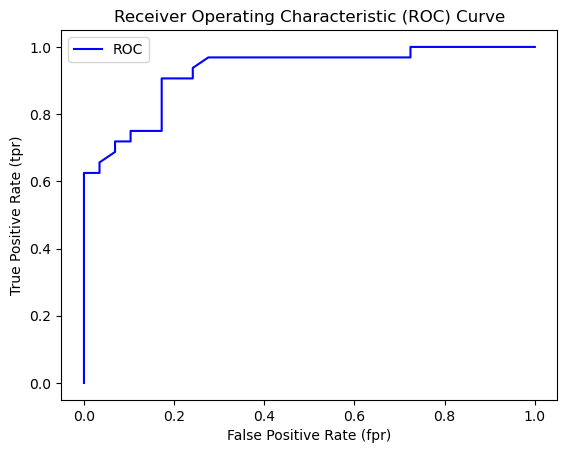

In [80]:
#creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="blue", label="ROC")

    #plot the line with no predictive power(baseline)
    # plt.plot([0,1], [0,1], color="darkred", linestyle="--", label="Guessing")

    #customizing the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr, tpr)

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

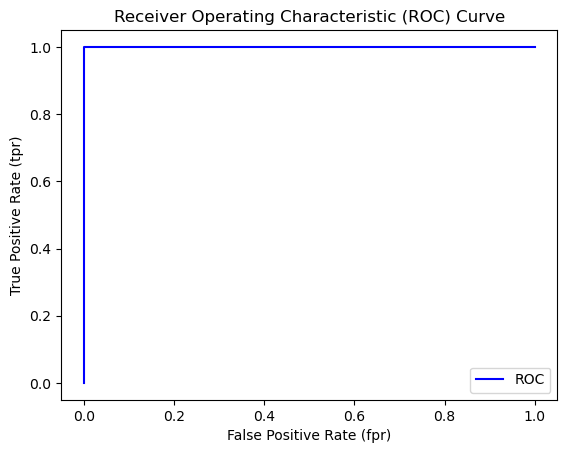

In [95]:
#plotting perfect roc curve
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [96]:
#perfect auc score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix** 
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused.

In [83]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]])

In [84]:
#visualizing using pd.crosstab()

pd.crosstab(y_test, y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


In [99]:
24+5+5+27

61

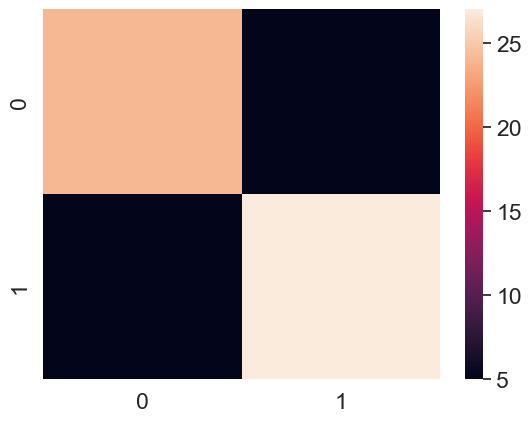

In [85]:
#making the confusion matrix more visual with seaborn's heatmap
import seaborn as sns

#setting font scale
sns.set(font_scale=1.5)

#creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

In [102]:
clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Creating a Confusion Matrix using Scikit-Learn



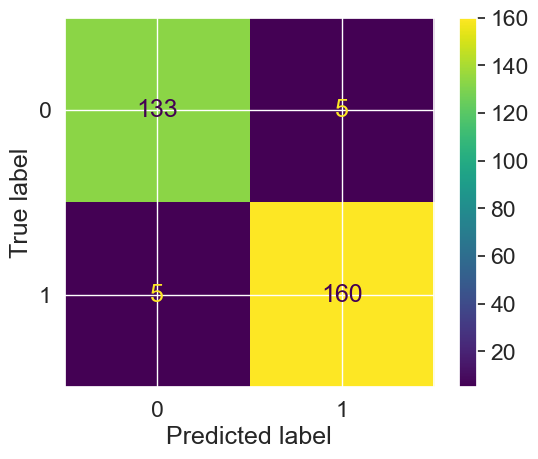

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

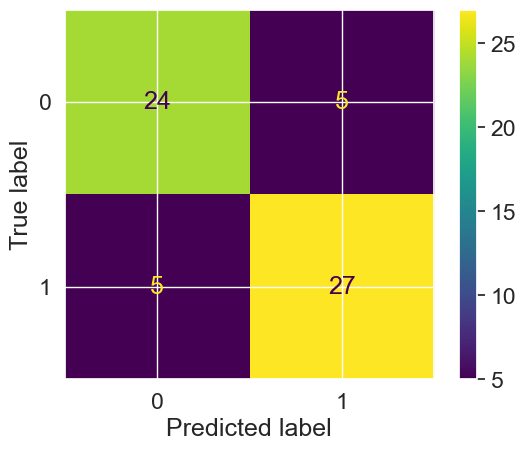

In [88]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

## Classification Report

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [91]:
import warnings
warnings.filterwarnings("ignore")

#where precision and recall become valuable
disease_true = np.zeros(1000)
disease_true[0] = 1 #one positive case

disease_preds = np.zeros(1000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


### Regression Model Evaluation Metrics

What we'll cover:
1. R^2 - coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [92]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


R^2 

What R-squared does : Compares the model predictions to the mean of the targets.Values can range from negative infinity (a very poor model) to 1.For example, if all the model does is predict the mean of the targets, it's `R^2` would be 0, and if it perfectly predicts a range of numbers its `R^2` value would be 1.

In [93]:
from sklearn.ensemble import RandomForestRegressor

#setting random seed
np.random.seed(42)

#creating features and labels
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model 
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
reg.score(x_test, y_test)

0.806652667101436

In [95]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [96]:
y_test.mean()

np.float64(2.0550030959302323)

In [97]:
from sklearn.metrics import r2_score

#fill an array with the y_test mean - test case
y_test_mean = np.full(len(y_test), y_test.mean())

In [98]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [99]:
r2_score(y_test, y_test_mean)

0.0

In [103]:
r2_score(y_test, y_test)

1.0

In [100]:
y_preds = reg.predict(x_test)

In [101]:
r2_score(y_test, y_preds)

0.806652667101436

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

Gives and idea of how wrong the model predictions are.

In [104]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = reg.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32656738464147306

In [105]:
df = pd.DataFrame(data={"Actual Values" : y_test,
                         "Predicted Values" : y_preds})
df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df.head()

,Actual Values,Predicted Values,Differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240


In [106]:
#MAE using formulas and differences
np.abs(df["Differences"]).mean()

np.float64(0.32656738464147306)

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between the actual and predicted values.

In [107]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = reg.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.25336408094921037

In [108]:
df["Squared Differences"] = np.square(df["Differences"])
df.head()

,Actual Values,Predicted Values,Differences,Squared Differences
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [109]:
#calculating mse by hand
squared = np.square(df["Differences"])
squared.mean()

np.float64(0.25336408094921037)

In [110]:
df_large_error = df.copy()
df_large_error.iloc[0]["Squared Differences"] = 16

In [111]:
df_large_error.head()

,Actual Values,Predicted Values,Differences,Squared Differences
20046,0.47700,0.493900,0.016900,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [112]:
#Calculating mse with large error
df_large_error["Squared Differences"].mean()

np.float64(0.25723998075298943)

In [113]:
df_large_error.iloc[1:100] = 20

In [114]:
df_large_error.head()

,Actual Values,Predicted Values,Differences,Squared Differences
20046,0.477,0.4939,0.0169,16.0
3024,20.000,20.0000,20.0000,20.0
15663,20.000,20.0000,20.0000,20.0
20484,20.000,20.0000,20.0000,20.0
9814,20.000,20.0000,20.0000,20.0


In [127]:
df_large_error["Squared Differences"].mean()

np.float64(0.7333102979585939)

## Finally using the `scoring` method

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#setting random seed
np.random.seed(42)

#creating features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

In [129]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X=x, y=y, cv=5, scoring=None) 
#If scoring=None, estimator's default scoring evaluation metric is used(accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
#Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f} %")

The cross-validated accuracy is : 82.48 %


In [131]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X=x, y=y, cv=5, scoring="accuracy")

print(f"The cross-validated accuracy is : {np.mean(cv_acc) * 100:.2f} %")

The cross-validated accuracy is : 82.48 %


In [132]:
#precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X=x, y=y, cv=5, scoring="precision")

print(f"The cross-validated precision is : {np.mean(cv_precision)}")

The cross-validated precision is : 0.8329547346025924


In [133]:
#recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X=x, y=y, cv=5, scoring="recall")
cv_recall

print(f"The cross-validated recall is : {np.mean(cv_recall)}")

The cross-validated recall is : 0.8545454545454545


## Using the `scoring` parameter for a regression problem

In [134]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#setting random seed
np.random.seed(42)

#creating features and labels
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = RandomForestRegressor()

In [136]:
np.random.seed(42)
cv_r2 = cross_val_score(reg, X=x, y=y, cv=3, scoring=None)
np.mean(cv_r2)

np.float64(0.6545660727379677)

In [137]:
#mean squared error
cv_mse = cross_val_score(reg, X=x, y=y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.43025886210571906)

In [138]:
cv_mse

array([-0.52532899, -0.34772023, -0.37442475, -0.43891057, -0.46490977])

In [139]:
#mean absolute error
cv_mae = cross_val_score(reg, X=x, y=y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-0.4825018729990311)

In [140]:
cv_mae

array([-0.51292963, -0.42556156, -0.50901443])

In [141]:
len(housing_df)

20640

### 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate Scikit-learn models or estimators is using the `sklearn.metrics` module

## Classification

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(42)

#creating features and labels
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model to data
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#making predictions
y_preds = clf.predict(x_test)

#Evaluating model using Scikit-learn functions
print("Classification metrics on the test set")

#accuracy score
acc_score = accuracy_score(y_test, y_preds)
print(f"Accuracy : {acc_score * 100:.2f}")

#precision
prec_score = precision_score(y_test, y_preds)
print(f"Precision : {prec_score :.5f})")

#recall score
rec_score = recall_score(y_test, y_preds)
print(f"Recall : {rec_score :.5f}")

#f1 score
print(f"f1 score : {(f1_score(y_test, y_preds)) :.5f}")

Classification metrics on the test set
Accuracy : 85.25
Precision : 0.84848)
Recall : 0.87500
f1 score : 0.86154


## Regression

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(42)

#creating features and labels
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fitting model to data
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

#making predictions
y_preds = reg.predict(x_test)

#Evaluating model using Scikit-learn functions
print("Regression metrics on test set")

#r2_score
print(f"R^2 : {r2_score(y_test, y_preds):.5f}")

#mean absolute error
print(f"MAE : {mean_absolute_error(y_test, y_preds) :.5f}")

#mean squared error
print(f"MSE : {mean_squared_error(y_test, y_preds) :.5f}")

Regression metrics on test set
R^2 : 0.80665
MAE : 0.32657
MSE : 0.25336


## 5. Improving a model

First prediction = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs. Hyperparameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [144]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

Trying to adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [146]:
def evaluate_classifier_preds(y_true, y_preds):
    """
    Performs evaluation comparison on the true labels vs the predicted labels on a classification algorithm/estimator.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metrics_dict = {"accuracy" : round(accuracy, 2),
                    "precision" : round(precision, 2),
                    "recall" : round(recall, 2),
                    "f1" : round(f1, 2)}

    print(f"Accuracy : {(metrics_dict['accuracy']) * 100} %")
    print(f"Precision : {metrics_dict['precision']}")
    print(f"Recall : {metrics_dict['recall']}")
    print(f"f1 : {metrics_dict['f1']}")

    return metrics_dict

In [147]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [149]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffling the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#splitting the data into features and labels
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#splitting the data into training, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# len(x_train), len(x_valid), len(x_test)

#fit model to data
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#make baseline predictions
y_preds = clf.predict(x_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_classifier_preds(y_valid, y_preds)
baseline_metrics

Accuracy : 82.0 %
Precision : 0.81
Recall : 0.88
f1 : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [167]:
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


## Baseline model

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(42)

#creating features and labels
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fitting model to data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#making predictions with model
y_preds = clf.predict(X_test)

#evaluating model
baseline_metrics = evaluate_classifier_preds(y_test, y_preds)

Accuracy : 80.0 %
Precision : 0.77
Recall : 0.82
f1 : 0.79


In [171]:
np.random.seed(42)

#creating classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

#make predictions
y_preds_2 = clf_2.predict(X_test)

#Evaluating the 2nd classifier
clf_2_metrics = evaluate_classifier_preds(y_test, y_preds_2)

Accuracy : 79.0 %
Precision : 0.74
Recall : 0.82
f1 : 0.78


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [172]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 20, 30],
         "max_features" : [None, "sqrt"],
         "min_samples_split" : [2, 4, 6],
         "min_samples_leaf" : [1, 2, 4]}

#setting random seed
np.random.seed(42)

#splitting data into features and labels
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

#setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,#number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, #setting random state to 42 for reproducibility
                            refit=True) #to refit the best model to the full dataset

#fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

In [173]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [174]:
#Making predictions with best hyperparametets
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_classifier_preds(y_test, rs_y_preds)

Accuracy : 84.0 %
Precision : 0.78
Recall : 0.89
f1 : 0.83


## 5.3 Hyperparameter tuning with GridSearchCV

In [175]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': [None, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [197]:
from sklearn.model_selection import GridSearchCV

grid_2 = {"n_estimators" : [100, 500, 1000],
        "max_depth" : [None, 30],
         "max_features" : [None, "sqrt"],
         "min_samples_split" : [2],
         "min_samples_leaf" : [2, 4, 6]}

#setting random seed
np.random.seed(42)

#splitting data into features and labels
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# #Instantiate RandomForestClassifier
# clf = RandomForestClassifier()

# #setup GridSearchCV
# gs_clf = GridSearchCV(estimator=clf,
#                             param_grid=grid_2,
#                             cv=5,
#                             verbose=2,
#                             refit = True) #to refit the model on full dataset

#fit the GridSearchCV version of clf
# gs_clf.fit(X_train, y_train);

In [177]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [178]:
gs_y_preds = gs_clf.predict(X_test)

#Evaluating the predictions
gs_metrics = evaluate_classifier_preds(y_test, gs_y_preds)

Accuracy : 84.0 %
Precision : 0.78
Recall : 0.89
f1 : 0.83


## Comparing the different model metrics

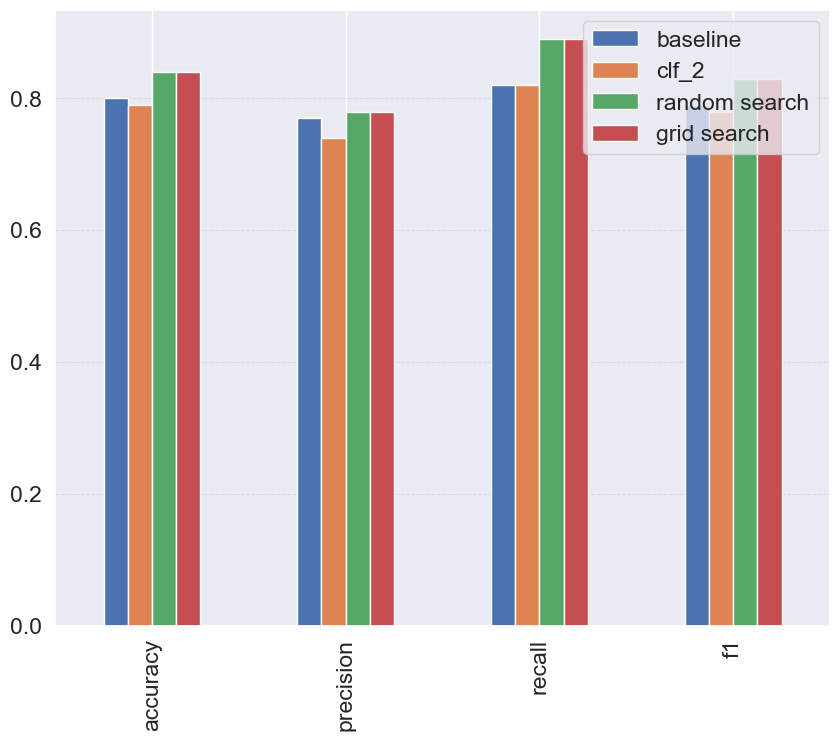

In [181]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "clf_2" : clf_2_metrics,
                                "random search" : rs_metrics,
                                 "grid search" : gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

# Add a grid with a softer color
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [182]:
import pickle

#saving existing model to file
pickle.dump(gs_clf, open("gs_random_forest_classifier.pkl", "wb"))

In [198]:
#loading saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_classifier.pkl", "rb"))

In [200]:
#making predictions with model
np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pickle_y_preds = loaded_pickle_model.predict(X_test)

#evaluate the model
evaluate_classifier_preds(y_test, pickle_y_preds)

Accuracy : 84.0 %
Precision : 0.78
Recall : 0.89
f1 : 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

In [201]:
#making predictions with model


# X = heart_disease_shuffled.drop("target", axis=1)
# y = heart_disease_shuffled["target"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pickle_y_preds = loaded_pickle_model.predict(X_test)

#evaluate the model
evaluate_classifier_preds(y_test, pickle_y_preds)

Accuracy : 84.0 %
Precision : 0.78
Recall : 0.89
f1 : 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

In [196]:
gs_metrics

{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [203]:
from joblib import dump,load

#save model to file
dump(gs_clf, filename="gs_random_forest_classifier.joblib")

['gs_random_forest_classifier.joblib']

In [204]:
#loading saved model
loaded_joblib_model = load("gs_random_forest_classifier.joblib")

In [207]:
#Make and evaluate joblib predictions
np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

joblib_y_preds = loaded_joblib_model.predict(X_test)

#Evaluate the model results
evaluate_classifier_preds(y_test, joblib_y_preds)

Accuracy : 84.0 %
Precision : 0.78
Recall : 0.89
f1 : 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7. Putting it all together

In [208]:
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [209]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps to do:

1. Fill missing data
2. Convert data to numbers
3. Build model on data

In [211]:
#Getting data ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setting up random seed
np.random.seed(42)

#import data and drop rows with missing labels
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
                                           ("one_hot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

num_feature = ["Odometer (KM)"]
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

#setting up pre-processing steps(filling and converting data to numbers)
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features),
                                               ("door", door_transformer, door_feature),
                                               ("num", num_transformer, num_feature)])

#creating preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

#splitting data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fitting and scoring the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22027638379177727

## Using `GridSearchCV` and `RandomizedSearchCV` with the pipeline

In [214]:
pipe_grid = {
       "preprocessor__num__imputer__strategy" : ["mean", "median"],
       "model__n_estimators" : [200, 500, 100],
       "model__max_features" : [None, "sqrt"],
       "model__max_depth" : [None, 30],
       "model__min_samples_split" : [2, 4]}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=None, model__max_features=None, model__min_samp

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'model__max_depth': [None, 30], 'model__max_features': [None, 'sqrt'], 'model__min_samples_split': [2, 4], 'model__n_estimators': [200, 500, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('door', ...), ...]"


In [215]:
gs_model.score(X_test, y_test)

0.24410354022179126